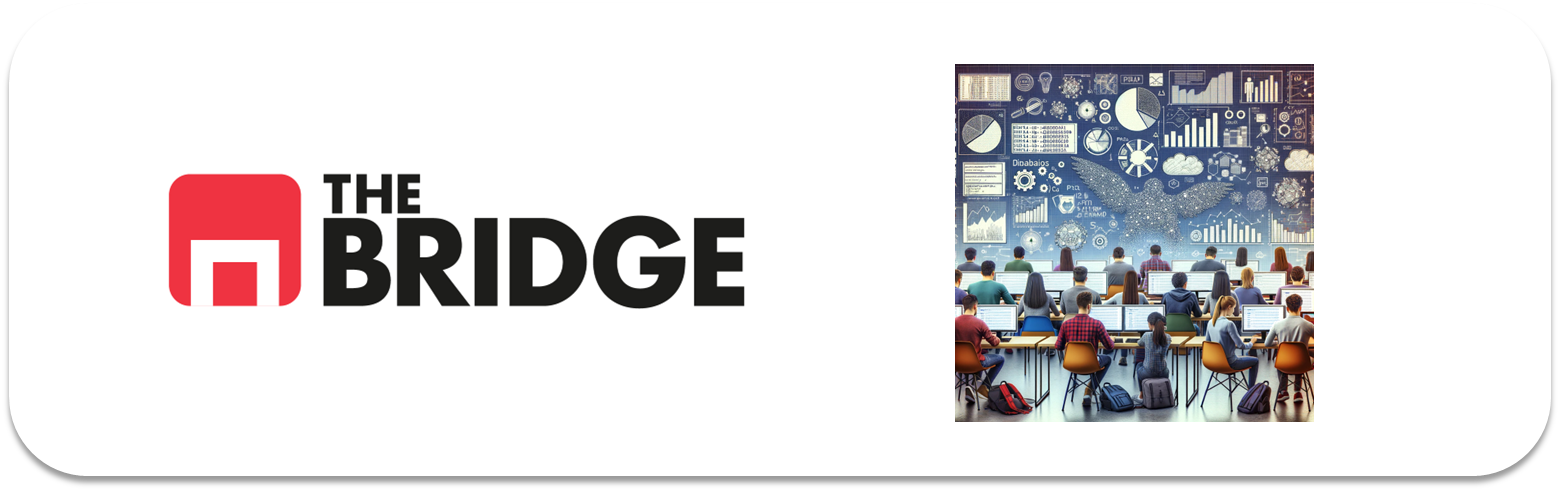

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un **modelo de regresión logística**, **evaluarlo contra un dataset de test** reservado del original **mostrando las métricas** propias de los problemas de clasificación, la **matriz de confusión** y la **curva ROC**. 

Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



#### 1. Carga el dataset del Titanic. 

In [2]:
df = pd.read_csv("./data/titanic.csv")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# ¿¿cual sería nuestra columna objetivo???

# En principio como queremos saber la probabilidad de supervivencia, nuestra columna TARGET sería survived
# Nos quedamos con SURVIVED pq está en 0-1 frente a la ALIVE (yes o no). Alive estária mas indicado para un EDA

# Supervivencia 1 - No supervevicencia 0

In [5]:
# si no tuvieramos columna objetivo, tendríamos que buscarla

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
# tenemos variables numericas y categoricas
# tenemos nulos
# nuestra variable ojetivo es SURVIVED

#### 2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [8]:
# SUPONIENDO que hemos tipificado cada columna, haber visto incluso la cardinalidad, etc...

In [9]:
# quitamos columnas redundantes como 
# ALIVE (usamos SURVIVED)
# CLASS (usamos PCLASS), asi no tendriamos que hacer un ON-HOT-ENCODING
# EMBARKED TOWN (usamos EMBARKED)
# ADULT_MALE (usaremos WHO, pq la obtuvimos de ahi)

# DECK, podría ser por el % de nulos altisimos, pero la dejamos

In [10]:
target = "survived"
excluidas = ["embark_town", "alive", "class", "adult_male"]

- Eliminacion de columnas

In [11]:
df_backup = df.copy
df.drop(columns = excluidas, axis=1, inplace=True)

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,NaN,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   who       891 non-null    object 
 9   deck      203 non-null    object 
 10  alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


### **Limpieza y primera seleccion** (las no convertidas)

- Limpia lo que creas necesarios pero no hagas imputaciones

Columnas con NULOS: AGE, DECK, EMBARKED

**Tendremos que IMPUTAR LOS NULOS, una vez hayamos hecho la división de TRAIN y TEST** 

¿POR QUÉ? 
- pq siendo una variable numerica (AGE por ejemplo), si imputamos los nulos antes de la división, sin darnos cuenta, estamos contaminando con datos de TEST, nuestros datos de TRAIN

- Siendo una variable categorica (EMBARKED), podriamos eliminarlos o bien, como excepción, tras haber hecho un value count, vemos que tiene un gran % que sea la moda, por lo que podríamos convertirlo al valor de la moda (y que estos valores caiga en nuestro TRAIN cuando dividamos)

- en el caso de DECK (categorica), podríamos cargánorsla pq tiene mucho datos faltantes o también, como no lo hemos analizado del todo bien, pdoriamos convertir los datos NaN en una nueva categoria, desconocidos. ¿pq? pq NaN, se trata como un valor numerico y luego nos falla para estratificar

In [14]:
# En la primera exploración vemos que la columna "deck" tiene un elevado porcentaje de valores faltantes
# Esos NaN se tratan como numericos
df["deck"].value_counts(dropna=False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [15]:
# copia
df_deck = df.copy()

# sobre la copia rellenamos con valores UNK
df_deck["deck"] = df_deck.deck.fillna("UNK")

In [16]:
#excluidas = ["alive","embark_town","class"]
features_base = [col for col in df_deck.columns if col not in excluidas]
features_base.remove("deck")
features_base_deck = [col for col in df_deck.columns if col not in excluidas]

In [17]:
features_base_deck

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'who',
 'deck',
 'alone']

#### 3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

In [18]:
target = "survived"

<Axes: xlabel='survived', ylabel='count'>

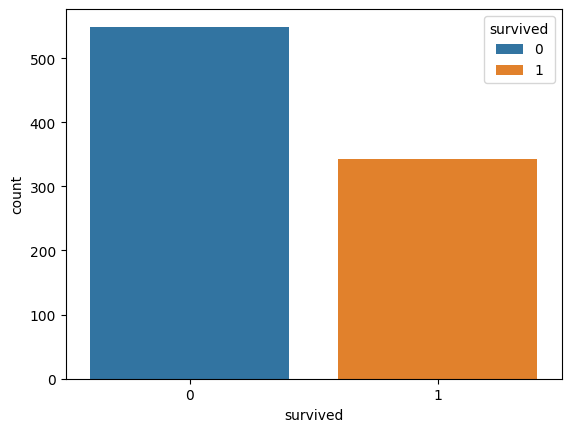

In [19]:
sns.countplot(df, x='survived', hue='survived')

#### 4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.


In [20]:
# Para que sea similar, tendremos que ESTRATIFICAR

### **Train and test split**

Quiero estratificar respecto a la ciudad de embarque pero tiene nulos y train_test_split con stratify no funciona si tenemos nulos.

Dos opciones:

1. Me cargo las filas.
2. Son dos, me olvido de los consejos de Jaime e imputo por la moda

In [21]:
# lo hicimos en el punto 2, cuando limpiamos

In [22]:
df_deck.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,UNK,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,UNK,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,UNK,True


In [23]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   who       891 non-null    object 
 9   deck      891 non-null    object 
 10  alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [24]:
# IMPUTO LA MODA A EMBARKED

# df_deck = df_deck.loc[df_deck.embarked.isna() == False].copy() # Si quiero cargarme las filas

df_deck.loc[df_deck["embarked"].isna(), "embarked"] = df_deck["embarked"].mode()[0] # Si quiero imputar por la moda

In [25]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   who       891 non-null    object 
 9   deck      891 non-null    object 
 10  alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [26]:
# divido en TRAIN y TEST

train_set, test_set = train_test_split(df_deck, test_size= 0.2, stratify= df_deck["embarked"], random_state= 42)

In [27]:
# Comprobamos estratificado en conjunto TRAIN
train_set.embarked.value_counts(normalize= True)

embarked
S    0.724719
C    0.188202
Q    0.087079
Name: proportion, dtype: float64

In [28]:
# Comprobamos estratificado en conjunto TEST
test_set.embarked.value_counts(normalize= True)

embarked
S    0.726257
C    0.189944
Q    0.083799
Name: proportion, dtype: float64

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       561 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   who       712 non-null    object 
 9   deck      712 non-null    object 
 10  alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 61.9+ KB


#### 5. Construye las parejas X,y de train y test.

#### 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

IMPUTAMOS nulos numéricas (columna AGE) **en base a valores de TRAIN**, pero se la imputamos a TRAIN y a TEST

- Hallamos las medias del dataset de TRAIN (los de TEST son "secretos"), y luego imputamos a los dos cojuntos TRAIN y SET, las medias que hallamos en TRAIN 


In [30]:
# no hacemos la media de todas las edades, sino que la hacemos por cada categoria de WHO, así es mas precisa
# a cada categoria, su edad

# Valores categoricos en TRAIN
es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

# MEDIAS por categoria en TRAIN
mean_man = train_set[es_hombre]["age"].mean()
mean_woman = train_set[es_mujer]["age"].mean()
mean_child = train_set[es_child]["age"].mean()

# NULOS en TRAIN y TEST
es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

#Imputamos en train
train_set.loc[es_hombre & es_nulo, "age"] = mean_man
train_set.loc[es_mujer & es_nulo, "age"] = mean_woman
train_set.loc[es_child & es_nulo, "age"] = mean_child

#Imputamos en test
test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = mean_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = mean_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = mean_child

In [31]:
test_set.info()

# ya no hay nulos

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 395 to 9
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  179 non-null    int64  
 1   pclass    179 non-null    int64  
 2   sex       179 non-null    object 
 3   age       179 non-null    float64
 4   sibsp     179 non-null    int64  
 5   parch     179 non-null    int64  
 6   fare      179 non-null    float64
 7   embarked  179 non-null    object 
 8   who       179 non-null    object 
 9   deck      179 non-null    object 
 10  alone     179 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 15.6+ KB


#### 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

### **Mini-EDA**

In [32]:
# habria que haber visto los duplicados ain incio, antes de separar

# Antes de imputar los nulos, habrá un numer de duplicados
# y una vez imputemos los nulos, el numero de duplicados puede cambiar (puede ser que lo estemos generando nosotros de manera aleatorio)

In [33]:
print(train_set.duplicated().sum(), "Valores duplicados en el train set")
train_set.drop_duplicates(inplace=True)
print((train_set.duplicated().sum()), "duplicados en el train set","\n",(train_set.isna().sum().sum()), "valores nulos en el train set ")

86 Valores duplicados en el train set
0 duplicados en el train set 
 0 valores nulos en el train set 


In [34]:
print(test_set.duplicated().sum(), "Valores duplicados en el test set")
test_set.drop_duplicates(inplace=True)
print((test_set.duplicated().sum()), "duplicados en el test set","\n",(test_set.isna().sum().sum()), "valores nulos en el test set ")

5 Valores duplicados en el test set
0 duplicados en el test set 
 0 valores nulos en el test set 


In [35]:
# Lo primero en las clasificaciones -> miramos la distribución del target
train_set[target].value_counts(normalize = True)

#  ligeramente balanceado

survived
0    0.602236
1    0.397764
Name: proportion, dtype: float64

Ligeramente desequilibrado, que no loco, habría que estudiar como equilibrarlo en caso de que los resultados no sean los adecuados para la clase que se quiera predecir con mayor prioridad. (tecnicas de undersampling u oversampling, por ejemplo u otras técnicas)

Usaremos el pairplot para verlo de mejor gracias al hue, pero en dos tandas y las categoricas ya pasadas a números (pclass, alone, adult_male) las veremos con su tabla de contigencia y el análisis visual

In [36]:
features_base_deck

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'who',
 'deck',
 'alone']

bivariante **target-NUMERICAS**

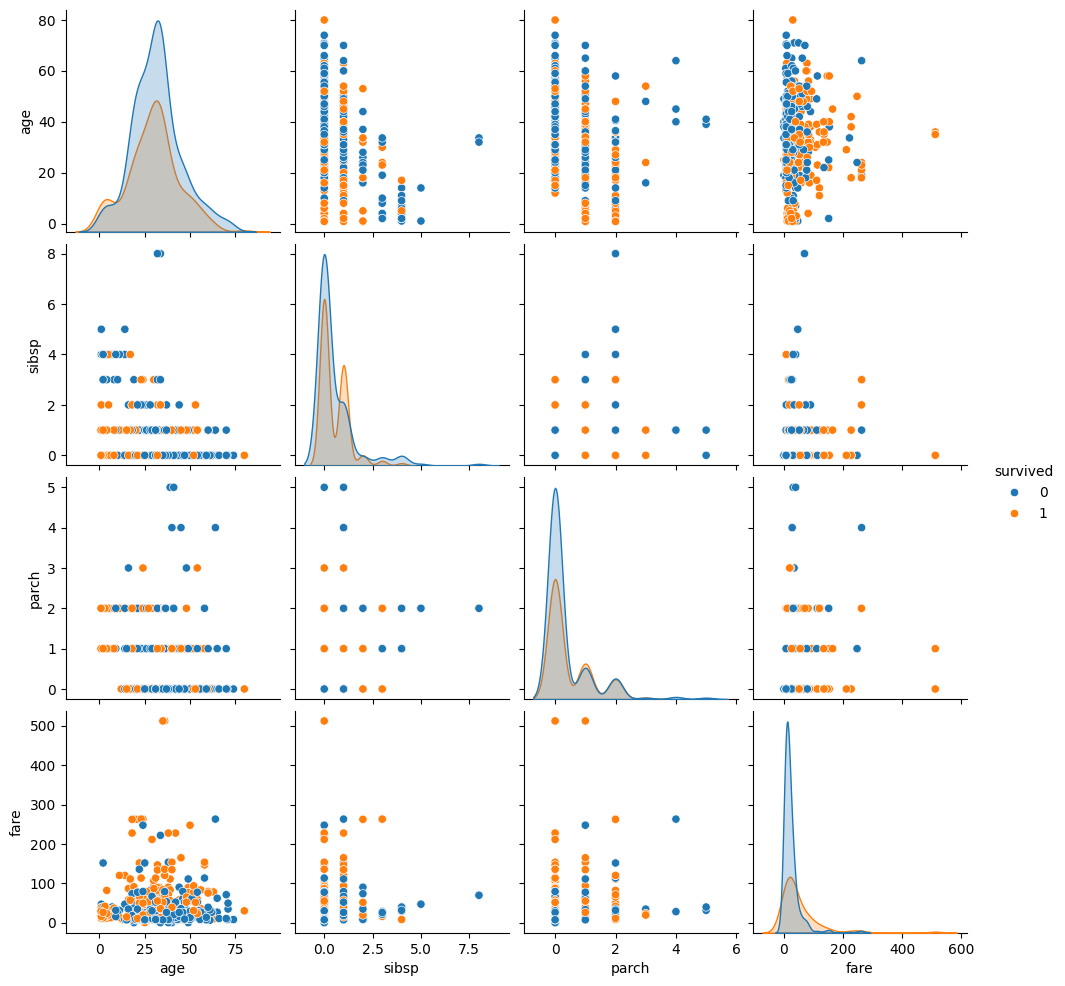

In [37]:
# Análisis visual de variables numéricas
features_num = ["age","sibsp","parch","fare"]

sns.pairplot(train_set[features_num + [target]], hue = target)

In [38]:
features_num = ["fare","age","sibsp"] # Descartamos "parch" parents and children porque no discrima entre clases de nuestro objetivo (son similares)

# podriamos seguir adelante y validarlas luego, pero para el ejercicio la vamos a descartar

bivariante **target-CATEGORICAS**

In [39]:
# Análisis visual categóricas
features_cat = ["pclass","sex","embarked","alone","who","deck"]

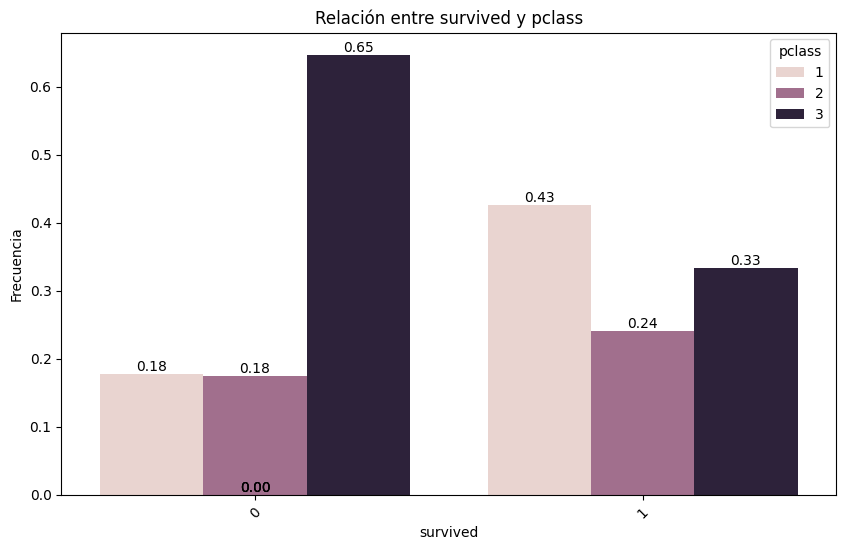

In [40]:
bt.plot_categorical_relationship_fin(train_set, 
                                     cat_col1=target, 
                                     cat_col2="pclass", 
                                     show_values= True, 
                                     relative_freq= True)

# Distribuciones distintas, por tanto me la quedo

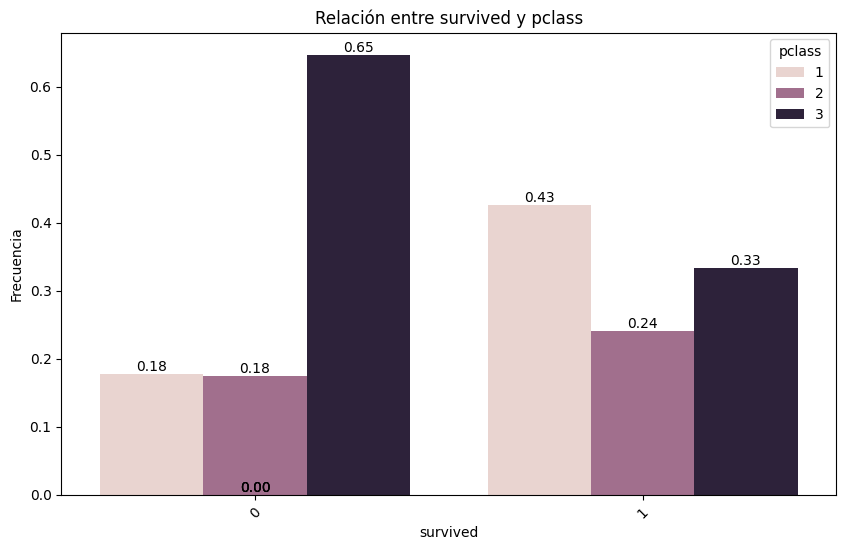

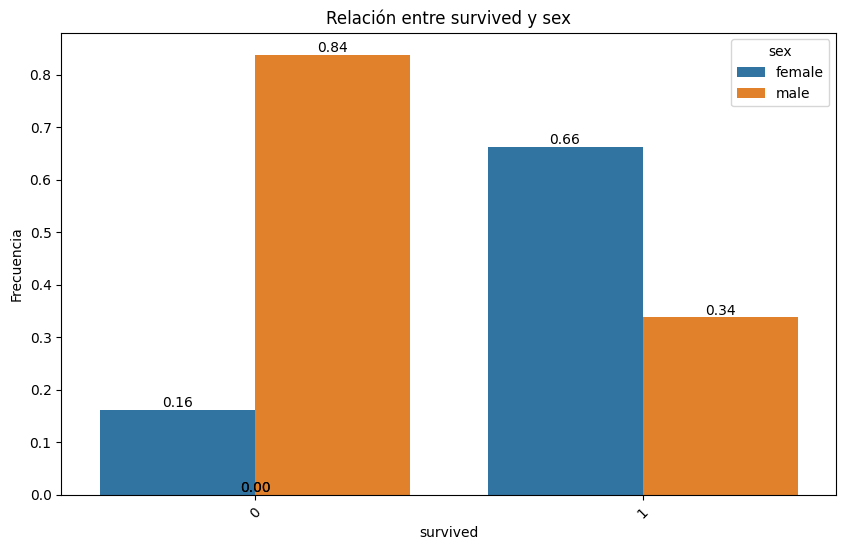

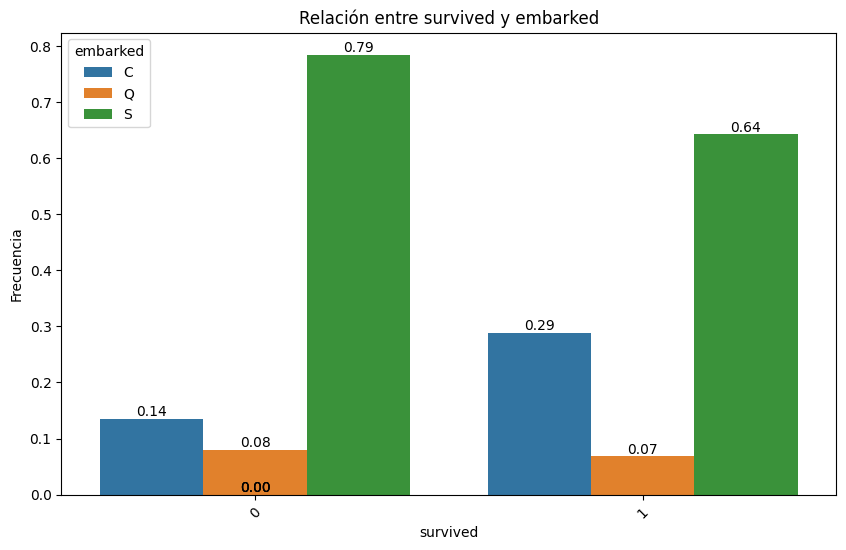

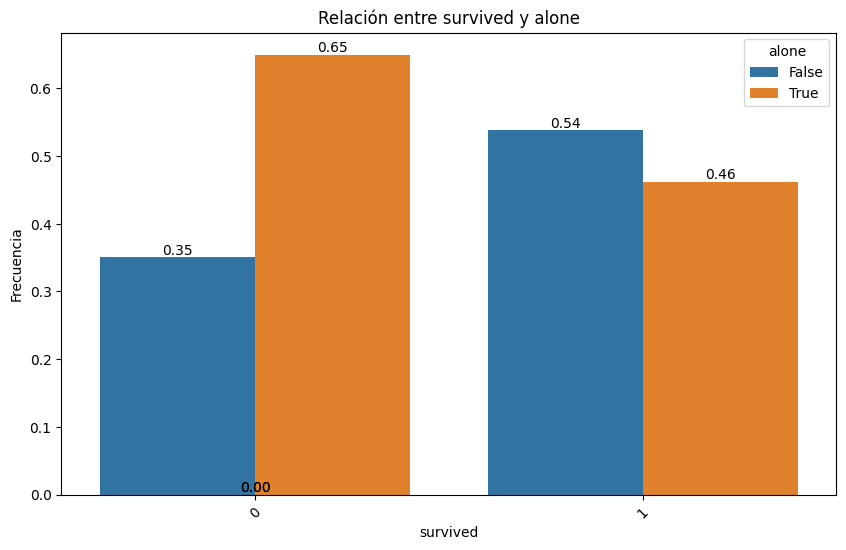

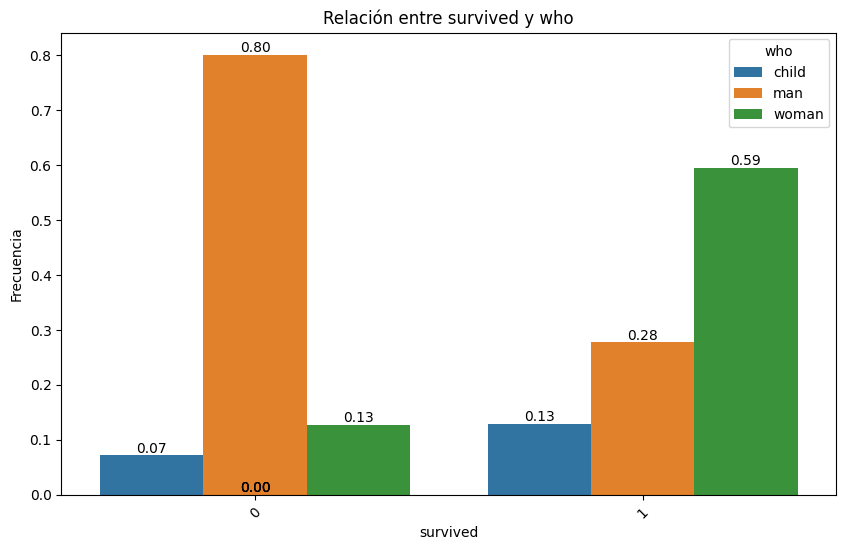

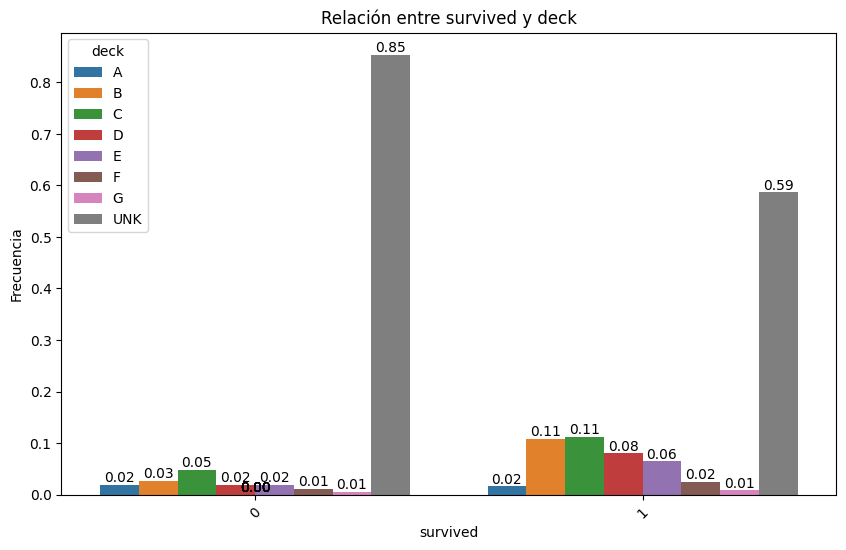

In [41]:
# CODIGO para verlas todas de una vez
features_cat = ["pclass","sex","embarked","alone","who","deck"]

for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

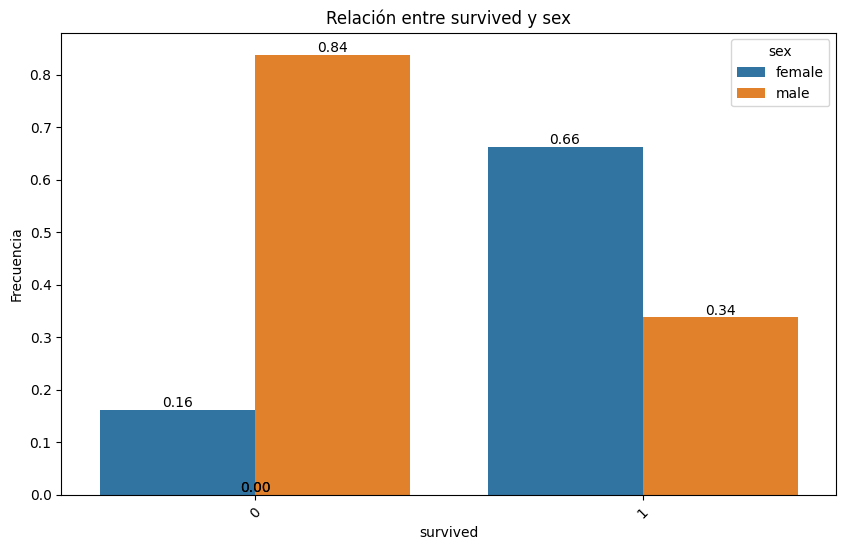

In [42]:
bt.plot_categorical_relationship_fin(train_set, 
                                     cat_col1=target, 
                                     cat_col2="sex", 
                                     show_values= True, 
                                     relative_freq= True)

# Distribuciones distintas, por tanto me la quedo

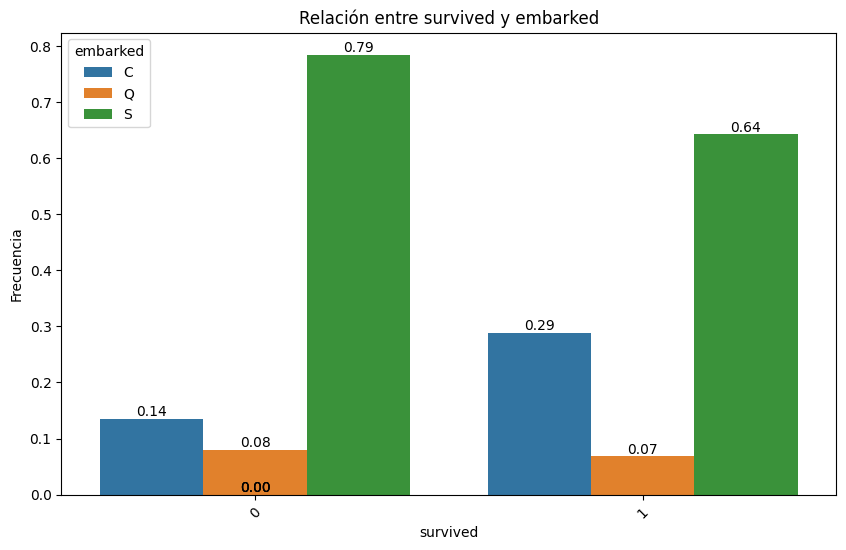

In [43]:
bt.plot_categorical_relationship_fin(train_set, 
                                     cat_col1=target, 
                                     cat_col2="embarked", 
                                     show_values= True, 
                                     relative_freq= True)

# Esta me ofrece dudas, porque parecen similares. Entrenamos miramos, y luego volvemos a entrenar y ver, pero sin la variable y demos si beneficia al modelo

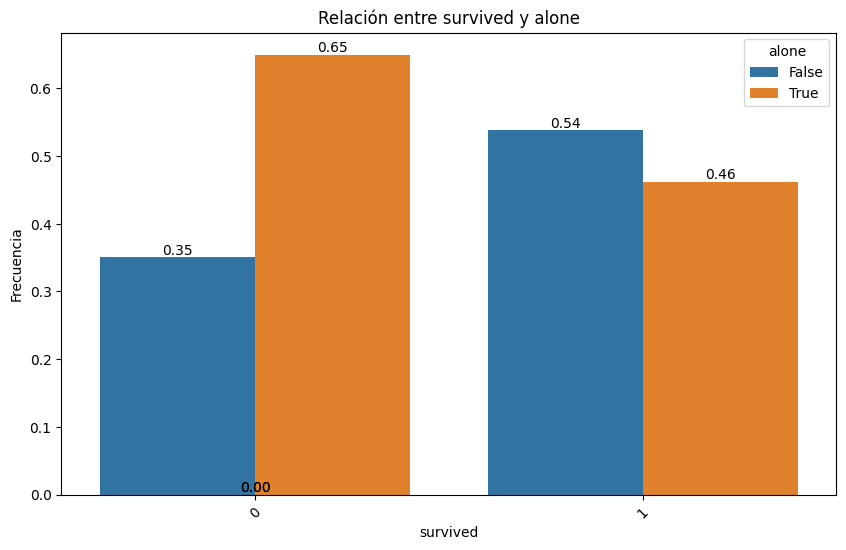

In [44]:
bt.plot_categorical_relationship_fin(train_set, 
                                     cat_col1=target, 
                                     cat_col2="alone", 
                                     show_values= True, 
                                     relative_freq= True)

# Se invierte, por tanto distribuciones distintas, me la quedo

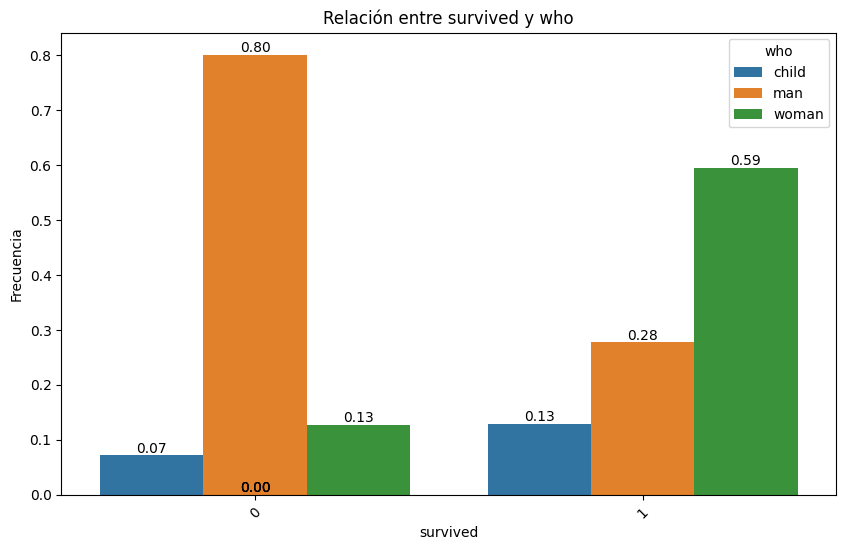

In [45]:
bt.plot_categorical_relationship_fin(train_set, 
                                     cat_col1=target, 
                                     cat_col2="who", 
                                     show_values= True, 
                                     relative_freq= True)

# Distribuciones distintas, por tanto me la quedo

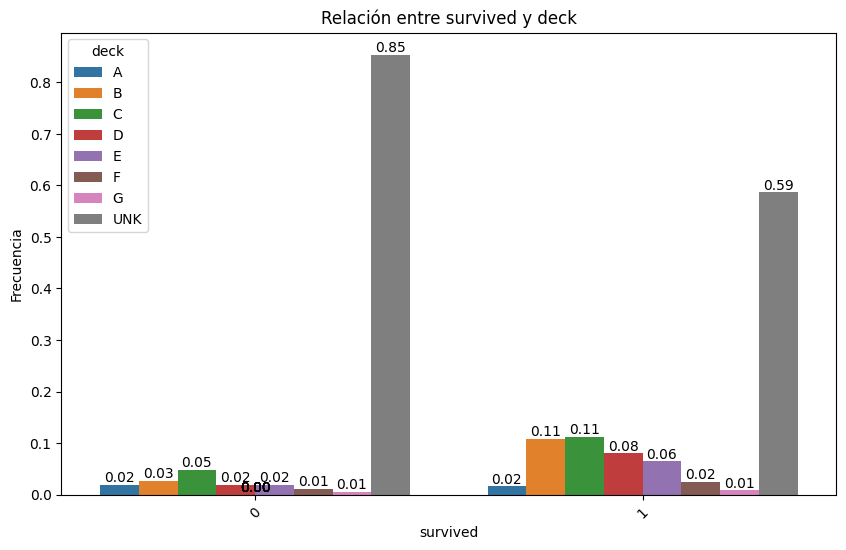

In [46]:
# en un principio no tiramos DECK, para llegar a este punto y valorar

bt.plot_categorical_relationship_fin(train_set, 
                                     cat_col1=target, 
                                     cat_col2="deck", 
                                     show_values= True, 
                                     relative_freq= True)

# Tenemos tantos NULOS, que quizas aqui podriamos simplificar entre nulos y no nulos (preguntar siempre al negocio si les vale)

In [47]:
# Para el caso de "deck" podemos transformarla en una nueva variable binaria "deck informed"
# Conozco o no conozco el deck -> deck_informed true or false
train_set["deck_informed"] = train_set.deck != "UNK"
test_set["deck_informed"] = test_set.deck != "UNK"

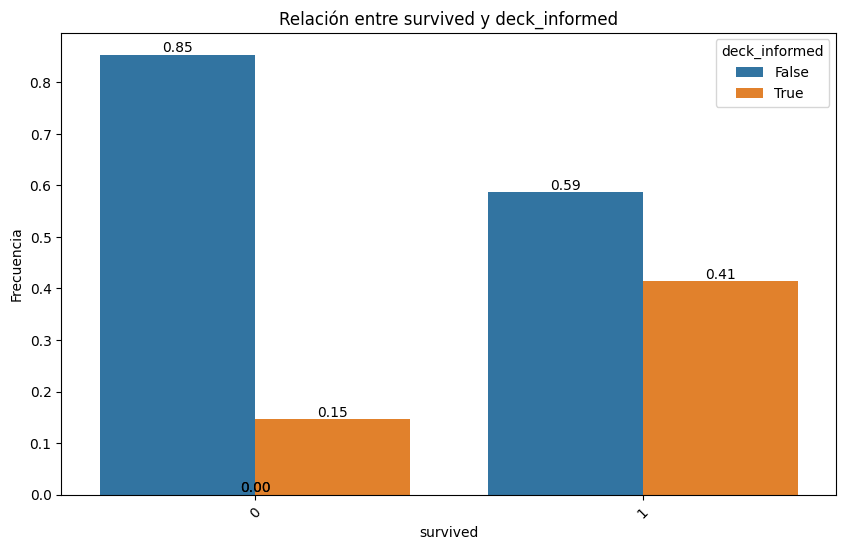

In [48]:
# tenemos ahora una columna binaria. Visualizamos
bt.plot_categorical_relationship_fin(train_set, target,"deck_informed", show_values= True, relative_freq= True)

# tienen misma forma, pero distribuciones diferentes

Me quedo con "pclass", "who", "embarked", "alone", "deck_informed", y por si acaso "fare", "age" y "sibsp"

In [49]:
features_cat.remove("deck")
features_cat.append("deck_informed")

In [50]:
features_num

['fare', 'age', 'sibsp']

In [51]:
features_cat

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

#### 8. Trata las variables para que funcionen lo mejor posible en el modelo.

### **Procesando categoricas**

In [52]:
from sklearn.preprocessing import OrdinalEncoder


In [53]:
categories = [["male","female"],["S","C","Q"], ["child","woman","man"]] # Podemos darle este orden, otro o ninguno

encoder = OrdinalEncoder(categories= categories)

train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])    # fit_transfor en TRAIN
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])          # al set de TEST solo transform

In [54]:
train_set[["sex","embarked","who"]]

,sex,embarked,who
838,0.0,0.0,2.0
621,0.0,0.0,2.0
282,0.0,0.0,2.0
275,1.0,0.0,1.0
217,0.0,0.0,2.0
...,...,...,...
856,1.0,0.0,1.0
594,0.0,0.0,2.0
166,1.0,0.0,1.0
785,0.0,0.0,2.0


In [55]:
## Podríamos haberlas procesado con One-hot encoding con pd.get_dummies
## También podríamos echar un ojo al OneHotEncoder de scikit-learn

#train_set = pd.get_dummies(train_set, columns=["embarked","who","deck"], dtype = int)
#test_set  = pd.get_dummies(test_set, columns =["embarked","who","deck"], dtype = int)

### **Procesando numéricas**

In [56]:
features_num

['fare', 'age', 'sibsp']

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>, <Axes: >]], dtype=object)

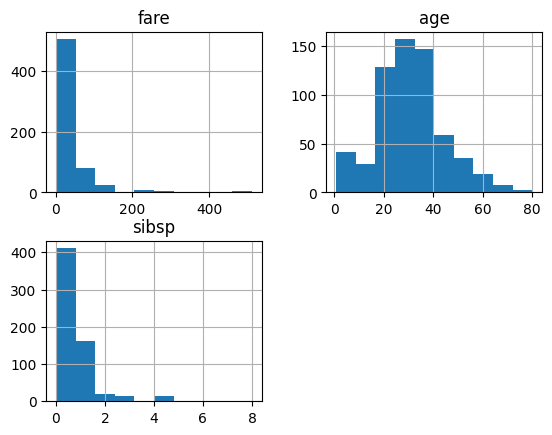

In [57]:
# Comprobamos distribución numéricas
train_set[features_num].hist()

ValueError: supplied range of [-inf, 6.238967387173662] is not finite

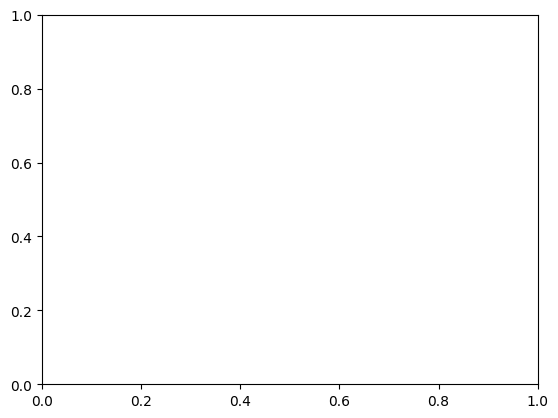

In [58]:
# Aplicamos logaritmo a fare y se rompe porque hay valores 0 
# Porque hay MUCHOS valores en 0, y log de 0 es = a infinito
train_set["fare"].apply(np.log).hist()

Deberíamos tratar el fare no podemos hacer logaritmos, posibles opciones:

1. Hacer log(x+1)
2. Hacer sqrt(x) o cbrt(x) (raiz cúbica)

<Axes: >

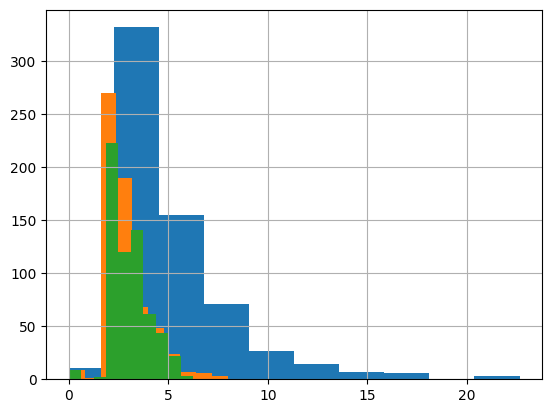

In [59]:
np.sqrt(train_set["fare"]).hist()   # Azul
np.cbrt(train_set["fare"]).hist()   # Naranja
np.log(train_set["fare"]+1).hist()  # Verde

<Axes: >

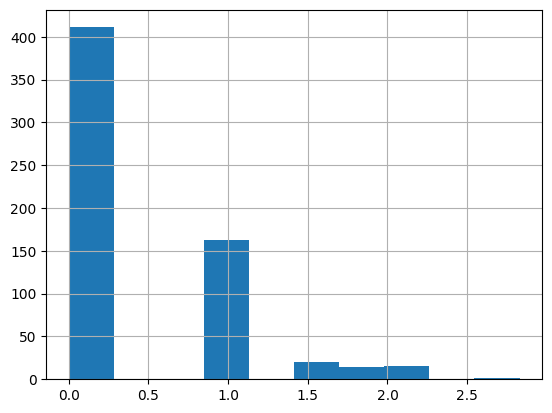

In [60]:
# RAIZ CUADRADA
train_set["sibsp"].apply(np.sqrt).hist()

<Axes: >

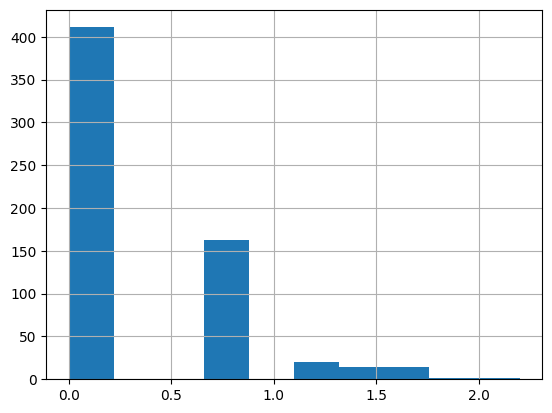

In [61]:
# RAIZ LOG A X+1
np.log(train_set["sibsp"]+1).hist()

In [62]:
# Aplicaremos raíz cuadrada a train y test
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])

train_set["sibsp"] = np.sqrt(train_set["sibsp"])
test_set["sibsp"] = np.sqrt(test_set["sibsp"])

# como AGE tiene una distribución correcta, no le hacemos nada

In [63]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone,deck_informed
838,1,3,0.0,32.000000,0.000000,0,7.516369,0.0,2.0,UNK,True,False
621,1,1,0.0,42.000000,1.000000,0,7.249428,0.0,2.0,D,False,True
282,0,3,0.0,16.000000,0.000000,0,3.082207,0.0,2.0,UNK,True,False
275,1,1,1.0,63.000000,1.000000,0,8.829400,0.0,1.0,D,False,True
217,0,2,0.0,42.000000,1.000000,0,5.196152,0.0,2.0,UNK,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,1.0,45.000000,1.000000,1,12.840043,0.0,1.0,UNK,False,False
594,0,2,0.0,37.000000,1.000000,0,5.099020,0.0,2.0,UNK,False,False
166,1,1,1.0,32.008982,0.000000,1,7.416198,0.0,1.0,E,False,True
785,0,3,0.0,25.000000,0.000000,0,2.692582,0.0,2.0,UNK,True,False


### **Escalamos**

In [64]:
scaler = StandardScaler()

In [65]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])

In [66]:
test_set[features_num] = scaler.transform(test_set[features_num])

In [67]:
train_set[features_num].describe()

,fare,age,sibsp
count,6.260000e+02,6.260000e+02,6.260000e+02
mean,-1.418815e-16,2.766690e-16,2.837631e-17
std,1.000800e+00,1.000800e+00,1.000800e+00
min,-1.638853e+00,-2.174789e+00,-6.770760e-01
25%,-7.224137e-01,-6.353004e-01,-6.770760e-01
50%,-3.428120e-01,8.916493e-02,-6.770760e-01
75%,2.157287e-01,4.423418e-01,9.938467e-01
max,5.729642e+00,3.566598e+00,4.049007e+00


In [68]:
test_set[features_num].describe()

,fare,age,sibsp
count,174.000000,174.000000,174.000000
mean,-0.018145,-0.157566,-0.029487
std,0.909608,0.935113,1.038796
min,-1.638853,-2.198697,-0.677076
25%,-0.715215,-0.689635,-0.677076
50%,-0.378218,-0.128175,-0.677076
75%,0.282748,0.234058,0.993847
max,3.271568,2.479901,4.049007


Una vez preparadas nuestras variables, hacemos unos cuantos sets de variables a ver cuál se comporta mejor con el modelo

In [69]:
# features_cat

In [70]:
# train_set = pd.get_dummies(train_set, columns = ["sex"], dtype = int)

In [71]:
train_set.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone,deck_informed
838,1,3,0.0,0.089165,-0.677076,0,0.808025,0.0,2.0,UNK,True,False


In [72]:
# features_cat_set_2 = # features_cat_set_1 + ["alone", "deck_informed", "sex_female", "embaked_S", "embarked_C", "embarked_Q"]

In [73]:
# features_cat_set_2

In [74]:
# Vamos a probar con estas categoricas
features_set_cat_1 = ["pclass","who"] # set de categóricas 1
features_set_cat_2 = features_cat # set de categóricas 2

In [75]:
features_set_cat_1

['pclass', 'who']

In [76]:
features_set_cat_2

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

In [77]:
features_num

['fare', 'age', 'sibsp']

### **Modelamos**

#### 9. Construye un modelo de regresión logística.

Esto nos permitiria testear tres tipos de clasificatores:
- Un clasificador que solo tenga las categoricas 1 (features_set_cat_1)
- Otro que tenga todas las categoricas
- otro que tenga todas las categiricas y las numericas

y ver como se comporta cada uno de los tres

In [78]:
# Separamos X_train(y_train) y X_test(y_test) - para HIPOTESIS NUM 1: tener dos categoricas (features_set_cat_1)
X_train = train_set[features_set_cat_1]
y_train = train_set[target]

X_test = test_set[features_set_cat_1]
y_test = test_set[target]

In [79]:
log_class_1 = LogisticRegression(max_iter = 10000)

log_class_1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [80]:
# funcion que en base a la predicción, nos pinta la matriz de confusion

def metrics_titanic(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       377
           1       0.81      0.59      0.68       249

    accuracy                           0.78       626
   macro avg       0.79      0.75      0.76       626
weighted avg       0.79      0.78      0.77       626



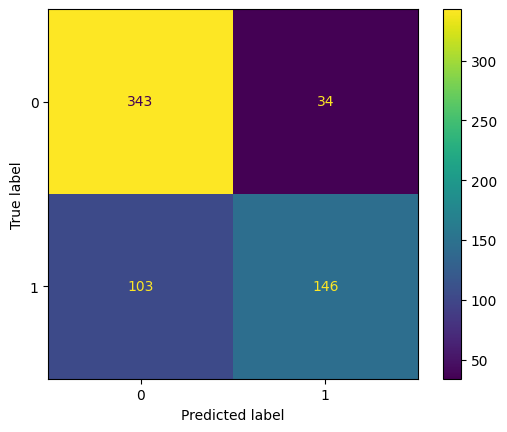

In [81]:
### TRAIN metrics
metrics_titanic(log_class_1, X_train, y_train)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        98
           1       0.86      0.63      0.73        76

    accuracy                           0.79       174
   macro avg       0.81      0.77      0.78       174
weighted avg       0.80      0.79      0.79       174


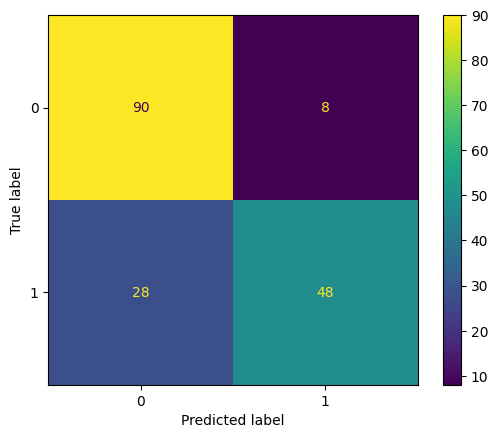

In [82]:
### TEST metrics
metrics_titanic(log_class_1, X_test,y_test)

AUROC: 0.87


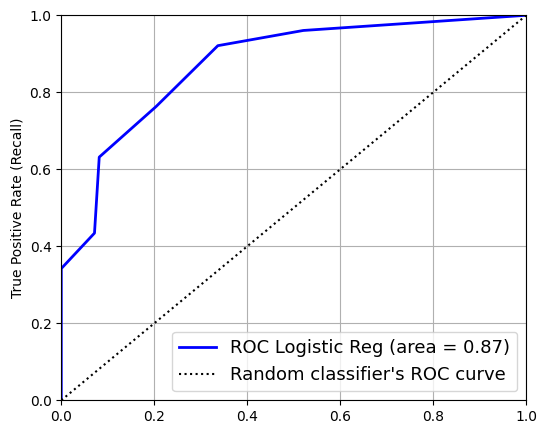

In [83]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [ ]:
# de partida 0.88 es un buen resultado.

### **Otro juego de features**


In [84]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone,deck_informed
838,1,3,0.0,0.089165,-0.677076,0,0.808025,0.0,2.0,UNK,True,False
621,1,1,0.0,0.813630,0.993847,0,0.721125,0.0,2.0,D,False,True
282,0,3,0.0,-1.069980,-0.677076,0,-0.635472,0.0,2.0,UNK,True,False
275,1,1,1.0,2.335007,0.993847,0,1.235469,0.0,1.0,D,False,True
217,0,2,0.0,0.813630,0.993847,0,0.052702,0.0,2.0,UNK,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,1.0,1.030970,0.993847,1,2.541093,0.0,1.0,UNK,False,False
594,0,2,0.0,0.451398,0.993847,0,0.021081,0.0,2.0,UNK,False,False
166,1,1,1.0,0.089816,-0.677076,1,0.775415,0.0,1.0,E,False,True
785,0,3,0.0,-0.417961,-0.677076,0,-0.762310,0.0,2.0,UNK,True,False


In [ ]:
# features_cat_set_2

In [85]:
train_set.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'deck', 'alone', 'deck_informed'],
      dtype='object')

In [86]:
test_set.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'deck', 'alone', 'deck_informed'],
      dtype='object')

In [87]:
test_set.deck.value_counts(dropna=False)

deck
UNK    130
C       13
E        9
B        9
D        6
A        4
F        3
Name: count, dtype: int64

In [88]:
test_set["deck_informed"] = test_set.deck != "UNK"

In [89]:
test_set.deck.value_counts(dropna=False)

deck
UNK    130
C       13
E        9
B        9
D        6
A        4
F        3
Name: count, dtype: int64

In [ ]:
# train_set.columns.to_list() == test_set.columns.to_list()

In [90]:
X_train = train_set[features_set_cat_2]
y_train = train_set[target]

X_test = test_set[features_set_cat_2]
y_test = test_set[target]

In [91]:
log_class_2 = LogisticRegression(max_iter = 10000)

log_class_2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Si hemos hecho onehot encondig, hay que completar posibles columnas faltantes cuando se ha hecho con get_dummies de pandas y en test no había alguno de los valores:

In [ ]:
#pero como no lo hemos hecho asi, por eso lo oculto como comentario y no aplico


# for col in X_train.columns:
#     if col not in test_set:
#         test_set[col] = 0

# X_train = train_set[features_set_cat_2]
# y_train = train_set[target]
# X_test = test_set[features_set_cat_2]
# y_test = test_set[target]

# log_class_2 = LogisticRegression(max_iter = 10000)
# log_class_2.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       377
           1       0.76      0.68      0.72       249

    accuracy                           0.79       626
   macro avg       0.78      0.77      0.78       626
weighted avg       0.79      0.79      0.79       626



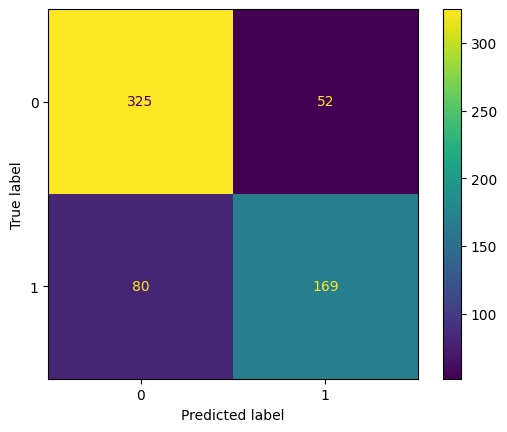

In [93]:
metrics_titanic(log_class_2, X_train,y_train)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        98
           1       0.87      0.76      0.81        76

    accuracy                           0.84       174
   macro avg       0.85      0.84      0.84       174
weighted avg       0.85      0.84      0.84       174



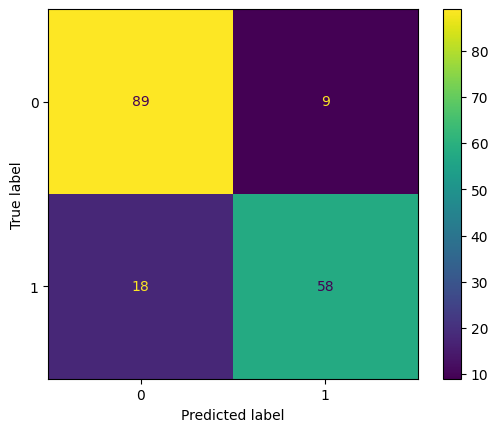

In [94]:
### test_metrics
metrics_titanic(log_class_2, X_test, y_test)


In [ ]:
# la micro y la macro están mejor / nos ha subido bastante el recall (mas sensible en categoria 1)

AUROC: 0.89


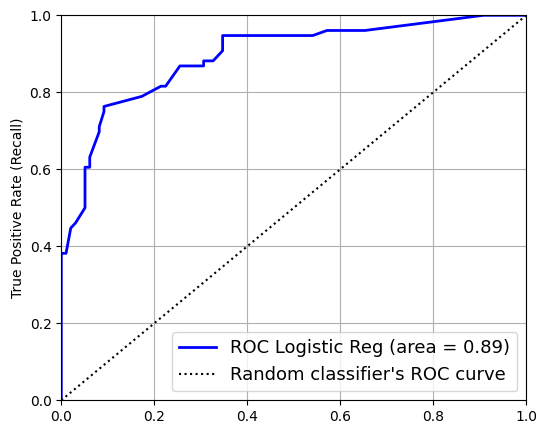

In [95]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [ ]:
# ha mejorado, ha subido a 0.9

In [96]:
### Con numéricas

X_train = train_set[features_set_cat_2 + features_num]
y_train = train_set[target]
X_test = test_set[features_set_cat_2 + features_num]
y_test = test_set[target]

log_class_3 = LogisticRegression(max_iter = 10000)

log_class_3.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       377
           1       0.76      0.68      0.72       249

    accuracy                           0.79       626
   macro avg       0.78      0.77      0.78       626
weighted avg       0.79      0.79      0.79       626



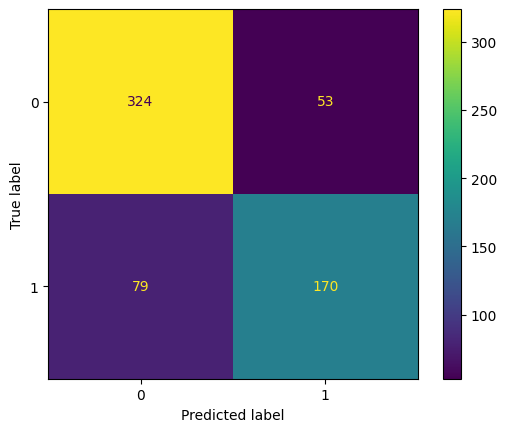

In [97]:
metrics_titanic(log_class_3, X_train, y_train)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        98
           1       0.85      0.80      0.82        76

    accuracy                           0.85       174
   macro avg       0.85      0.85      0.85       174
weighted avg       0.85      0.85      0.85       174



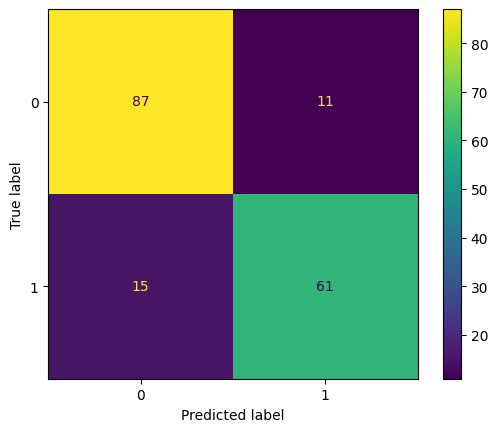

In [98]:
metrics_titanic(log_class_3, X_test, y_test)

AUROC: 0.91


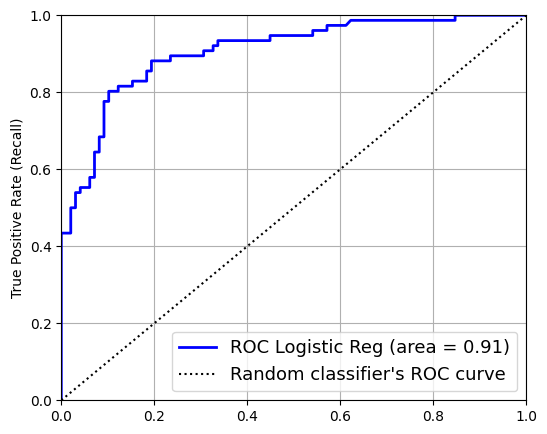

In [99]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [ ]:
# aun mejor

#### 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.

#### 11. Procesa el dataset de Test para que puedas usarlo en la evaluación  

#### 12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

### 13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.

In [100]:
features_set_cat_2 + features_num

['pclass',
 'sex',
 'embarked',
 'alone',
 'who',
 'deck_informed',
 'fare',
 'age',
 'sibsp']

In [ ]:
# nuestros modelos no trabajan por rangos de edad
# tendriamos que probar a predecir, diferentes vectores que le pidieramos la probabilidad de un hombre de 31 años, para 32, para 33...
# en base a todas esas probabilidades, sacamos la meda

In [101]:
data_base = {
    "pclass": 2,
    "embarked": 0,
    "alone": True,
    "fare": 0,
    "who":2,
    "deck_informed": 0,
    "sibsp": 0,
    "sex": 0
}

probs = []
for age in range(30,41):
    data = data_base.copy()
    data["age"] = age
    X_man = pd.DataFrame([data])
    X_man[features_num] = scaler.transform(X_man[features_num])
    print(X_man)
    prob_dead, prob_surv = log_class_3.predict_proba(X_man[features_set_cat_2 + features_num])[0]
    probs.append(prob_surv)
    
print("Prob media de sobrevivir:", np.mean(probs))

# Prob media de sobrevivir: 0.17464609645501616 (bastante mal como lo que predejimos en otras practicas)
# esto es para demotras que ML te predice aunque no tenga datos

   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.638853    2              0 -0.677076    0   

        age  
0 -0.055728  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.638853    2              0 -0.677076    0   

        age  
0  0.016718  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.638853    2              0 -0.677076    0   

        age  
0  0.089165  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.638853    2              0 -0.677076    0   

        age  
0  0.161611  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.638853    2              0 -0.677076    0   

        age  
0  0.234058  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.

14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report. 

In [102]:
target = "survived"

In [103]:
new_features = features_set_cat_2 + features_num + [target]
new_target = "pclass"
new_features.remove(new_target)
print(new_features)

['sex', 'embarked', 'alone', 'who', 'deck_informed', 'fare', 'age', 'sibsp', 'survived']


In [104]:

X_train = train_set[new_features]
y_train = train_set[new_target]

X_test = test_set[new_features]
y_test = test_set[new_target]

In [105]:
X_train

,sex,embarked,alone,who,deck_informed,fare,age,sibsp,survived
838,0.0,0.0,True,2.0,False,0.808025,0.089165,-0.677076,1
621,0.0,0.0,False,2.0,True,0.721125,0.813630,0.993847,1
282,0.0,0.0,True,2.0,False,-0.635472,-1.069980,-0.677076,0
275,1.0,0.0,False,1.0,True,1.235469,2.335007,0.993847,1
217,0.0,0.0,False,2.0,False,0.052702,0.813630,0.993847,0
...,...,...,...,...,...,...,...,...,...
856,1.0,0.0,False,1.0,False,2.541093,1.030970,0.993847,1
594,0.0,0.0,False,2.0,False,0.021081,0.451398,0.993847,0
166,1.0,0.0,False,1.0,True,0.775415,0.089816,-0.677076,1
785,0.0,0.0,True,2.0,False,-0.762310,-0.417961,-0.677076,0


In [106]:
log_class = LogisticRegression(max_iter=10000)

log_class.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           1       0.90      0.90      0.90       173
           2       0.64      0.36      0.46       126
           3       0.79      0.93      0.85       327

    accuracy                           0.80       626
   macro avg       0.78      0.73      0.74       626
weighted avg       0.79      0.80      0.79       626



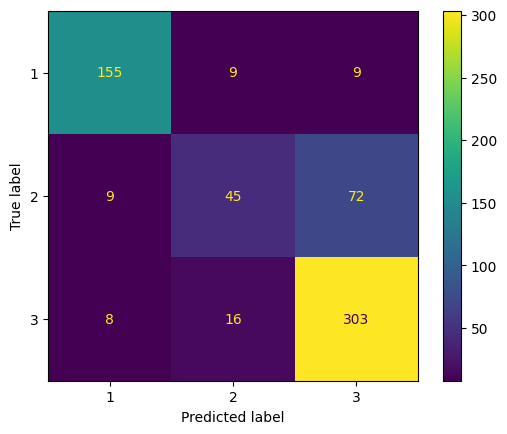

In [107]:
# siendo ahora multiclase

metrics_titanic(log_class,X_train, y_train)

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        41
           2       0.71      0.45      0.56        44
           3       0.81      0.91      0.86        89

    accuracy                           0.82       174
   macro avg       0.81      0.79      0.79       174
weighted avg       0.80      0.82      0.80       174



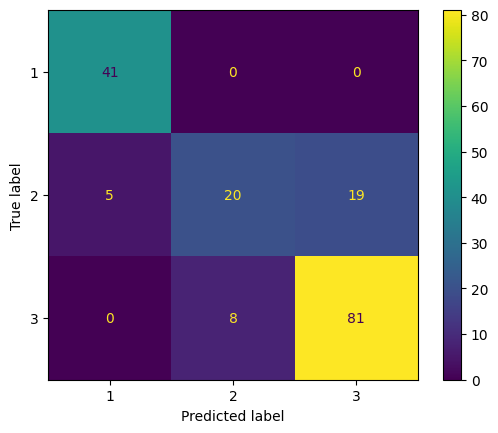

In [108]:
# siendo ahora multiclase


metrics_titanic(log_class,X_test, y_test)
